In [ ]:
# Step 1: Import the required libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('Tweets.csv')  # make sure the file is in the same folder or give full path

# Step 3: View basic info
print("Shape of dataset:", df.shape)
print("Columns available:", df.columns)
df.head()


Shape of dataset: (14640, 15)
Columns available: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dorababulalam/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www.\S+", "", text)
    # Remove @mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Remove extra spaces
    text = text.strip()
    # Remove stopwords
    words = text.split()
    words = [w for w in words if not w in stop_words]
    text = ' '.join(words)
    return text

# Filter the dataframe for just positive and negative
df = df[df['airline_sentiment'].isin(['positive','negative'])]

# Apply clean_text to new column
df['clean_text'] = df['text'].apply(clean_text)

# Optional: check your work
print(df[['text', 'clean_text']].sample(5))


                                                    text  \
9845   @usairways the. Worst. Ever. #dca #customerser...   
9739   @USAirways worst service at Reagan Int. I rare...   
12945  @AmericanAir after waiting for a delayed plane...   
6117   @SouthwestAir thank u for not leaving me \n@me...   
14136  @AmericanAir I’ve been on the line waiting for...   

                                              clean_text  
9845                                          worst ever  
9739   worst service reagan int rarely post company s...  
12945  waiting delayed plane sat plane hour waiting l...  
6117   thank u leaving nice job running thru airport ...  
14136                          i’ve line waiting minutes  


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Convert labels to binary (positive = 1, negative = 0)
df['label'] = df['airline_sentiment'].map({'positive': 1, 'negative': 0})

# 2. Extract inputs (X) and outputs (y)
X = df['clean_text']
y = df['label']

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=2500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF Vectorization complete.")
print("Shape of training data:", X_train_tfidf.shape)
print("Shape of test data:", X_test_tfidf.shape)


TF-IDF Vectorization complete.
Shape of training data: (9232, 2500)
Shape of test data: (2309, 2500)


Matplotlib is building the font cache; this may take a moment.


✅ Accuracy: 0.8926

📋 Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.98      0.94      1836
    Positive       0.89      0.54      0.67       473

    accuracy                           0.89      2309
   macro avg       0.89      0.76      0.80      2309
weighted avg       0.89      0.89      0.88      2309



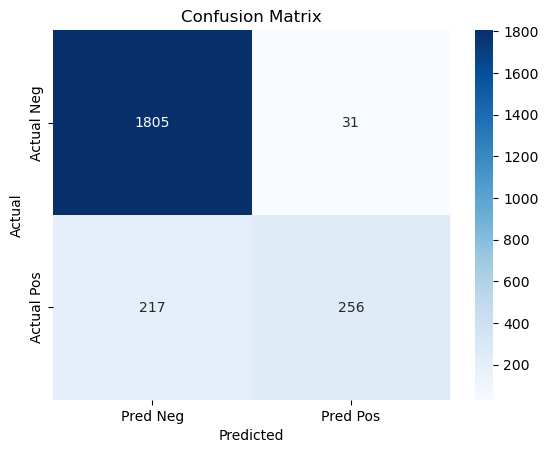


🔍 Some sample predictions:
Tweet: @USAirways now on hold with customer care.  Wonder if someone will pick up the phone before 5pm.
Actual: Negative | Predicted: Negative
--------------------------------------------------------------------------------
Tweet: @USAirways I ask for reimbursement maybe miles added to my account for my inconvenience and for the money that I had to spend
Actual: Negative | Predicted: Negative
--------------------------------------------------------------------------------
Tweet: @AmericanAir Thank you for holding, we apologize for the delay in answering your call. To speak to a representative please continue to hold.
Actual: Negative | Predicted: Negative
--------------------------------------------------------------------------------
Tweet: @SouthwestAir Secondly, we did not begin boarding on time despite our aircraft being present and deplaned. Thus we left over 30 min Late Flight
Actual: Negative | Predicted: Negative
-------------------------------------

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 2. Make predictions
y_pred = model.predict(X_test_tfidf)

# 3. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# 4. Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred Neg", "Pred Pos"], yticklabels=["Actual Neg", "Actual Pos"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5. Optional: Show 5 sample predictions
print("\n🔍 Some sample predictions:")
sample_indexes = X_test.sample(5, random_state=1).index
for idx in sample_indexes:
    tweet = df.loc[idx, 'text']
    true_label = 'Positive' if df.loc[idx, 'label'] == 1 else 'Negative'
    pred_label = 'Positive' if model.predict(vectorizer.transform([df.loc[idx, 'clean_text']]))[0] == 1 else 'Negative'
    print(f"Tweet: {tweet}")
    print(f"Actual: {true_label} | Predicted: {pred_label}")
    print("-" * 80)
